### Imports

In [62]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
%autoreload 2

In [64]:
from IPython.display import display
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.vfm.utils.descriptive_utils import *
from src.vfm.model.hybrid.physics_informed import PhysicsInformedHybridModel
import json

In [65]:
connection = Connection()
# Get client
client = connection.get_client()

In [66]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'gl_mass_rate',
       'gl_open_ratio', 'qo_well_test', 'qg_well_test', 'qw_well_test',
       'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id'],
      dtype='object')

In [67]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [68]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Total original record count 834
W06 original record count: 137
W06 Record count before target preprocessing: 100
eps=3.417602083918777e-07
W06 Record count after target preprocessing: 100
W06 Record count after preprocessing: 100
W08 original record count: 69
W08 Record count before target preprocessing: 66
eps=2.9518529494535888e-05
W08 Record count after target preprocessing: 66
W08 Record count after preprocessing: 66
W10 original record count: 222
W10 Record count before target preprocessing: 221
eps=3.350809591825767e-08
W10 Record count after target preprocessing: 221
W10 Record count after preprocessing: 221
W11 original record count: 154
W11 Record count before target preprocessing: 119
eps=1.0177683450396633e-08
W11 Record count after target preprocessing: 119
W11 Record count after preprocessing: 119
W15 original record count: 86
W15 Record count before target preprocessing: 86
eps=1.7896994683588753e-05
W15 Record count after target preprocessing: 86
W15 Record count after p

755

In [69]:
summarize_null(df_all_wells_preprocessed)

qo_well_test      0
qg_well_test      0
qw_well_test      0
well_code         0
dhp               0
dht               0
whp               0
wht               0
choke             0
dcp               0
gl_mass_rate      0
gl_open_ratio     0
qo_mpfm          30
qg_mpfm          30
qw_mpfm          30
wc_mpfm           0
gor_mpfm         35
wgr_mpfm         36
gor_well_test     0
wgr_well_test     0
well_id           0
time_idx          0
dtype: int64

In [70]:
df_train, df_val, df_test = get_random_train_val_test_split_per_well_temporal_order(df=df_all_wells_preprocessed)
print(f"Train={len(df_train)}, Validation={len(df_val)}, Test={len(df_test)}")

Train=511, Validation=90, Test=154


In [71]:
well_geometry: dict = None

with open(r"data\well_geometry.json", "r") as f:
    well_geometry = json.load(f)

In [72]:
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.7324


In [73]:
physics_scores = model.score_physics(df_test)
physics_scores

{'W06': {'qo': {'r2': 0.7916610297513745,
   'mae': 11.294190104895012,
   'rmse': 14.774127347512614,
   'mape (%)': 11.873110673700696,
   'mpe (%)': 6.521564239200689},
  'qw': {'r2': 0.019435771640239574,
   'mae': 1.1065994799287557,
   'rmse': 1.275868313463948,
   'mape (%)': 17339296.89276786,
   'mpe (%)': 17339261.78185765},
  'qg': {'r2': 0.5516022753152711,
   'mae': 2095.918677101438,
   'rmse': 2785.3789991038443,
   'mape (%)': 11.85050813243998,
   'mpe (%)': -7.656067843189537},
  'wgr': {'r2': -0.005661526838108832,
   'mae': 7.73223506890231e-05,
   'rmse': 9.28099073912815e-05,
   'mape (%)': 1184.3540802400341,
   'mpe (%)': 1153.3743561593285},
  'gor': {'r2': -57.61989081045291,
   'mae': 17.704562256077857,
   'rmse': 21.33532061960259,
   'mape (%)': 14.174132598849361,
   'mpe (%)': -12.321104985945595}},
 'W08': {'qo': {'r2': -0.694856495370888,
   'mae': 12.492456065516196,
   'rmse': 14.167188907095133,
   'mape (%)': 60.75139609119351,
   'mpe (%)': -2.873

In [74]:
hybrid_scores = model.score_hybrid(df_test)
hybrid_scores

{'W06': {'qo': {'r2': 0.9321399452257602,
   'mae': 7.001050656691575,
   'rmse': 8.431865774484537,
   'mape (%)': 5.889542654985209,
   'mpe (%)': -2.2688969600497266},
  'qw': {'r2': -1.1802989276402096,
   'mae': 1.3997930570735746,
   'rmse': 1.9025051866010843,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.8881892440668381,
   'mae': 1059.1278770559843,
   'rmse': 1390.8951365939702,
   'mape (%)': 6.804149930787519,
   'mpe (%)': -2.098687950661427},
  'wgr': {'r2': -1.1793177147047813,
   'mae': 0.0001005041124083458,
   'rmse': 0.0001366245347132191,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': -13.944957083948928,
   'mae': 7.980321735657353,
   'rmse': 10.772686146619822,
   'mape (%)': 6.409375670636426,
   'mpe (%)': 0.3489083805085054}},
 'W08': {'qo': {'r2': 0.2700035404733824,
   'mae': 7.978700834287986,
   'rmse': 9.297744244008248,
   'mape (%)': 53.39643225340818,
   'mpe (%)': 26.76045366990448},
  'qw': {'r2': 0.7185044917600918,
  

In [75]:
mpfm_scores = model.score_mpfm(df=df_test)
mpfm_scores

{'W06': {'qo': {'r2': 0.9405451858068219,
   'mae': 5.658478194205115,
   'rmse': 7.892418295168448,
   'mape (%)': 4.164792659575739,
   'mpe (%)': 4.062720943386236},
  'qw': {'r2': -0.6081799803850165,
   'mae': 1.1949178912275649,
   'rmse': 1.633936425117399,
   'mape (%)': 998513.4367338838,
   'mpe (%)': 998355.6913952625},
  'qg': {'r2': 0.9484657660522412,
   'mae': 607.2501785081344,
   'rmse': 944.27938623534,
   'mape (%)': 3.9662955506626267,
   'mpe (%)': 3.9401405595316685},
  'wgr': {'r2': -0.4257879340529416,
   'mae': 8.340263423904698e-05,
   'rmse': 0.00011050855215201018,
   'mape (%)': 90.63729356790573,
   'mpe (%)': -75.56026272274013},
  'gor': {'r2': -2.997946132652433,
   'mae': 3.813502685983992,
   'rmse': 5.571795140155176,
   'mape (%)': 3.0441869493790628,
   'mpe (%)': -0.036357076284494666}},
 'W08': {'qo': {'r2': 0.4351901421776878,
   'mae': 5.437132204658665,
   'rmse': 8.178400095075876,
   'mape (%)': 51.41527977198608,
   'mpe (%)': 45.0180033570

In [76]:
# df_physics = scores_to_df(physics_scores, "Physics")
# df_hybrid  = scores_to_df(hybrid_scores,  "Hybrid")
# df_mpfm    = scores_to_df(mpfm_scores,    "MPFM")

# df_all = pd.concat([df_physics, df_hybrid, df_mpfm], ignore_index=False)

# for well in get_all_wells():
#     df_display = df_all[(df_all["well_id"] == well) & (df_all["metric"] == "r2") & (df_all["variable"].isin(["qg", "qo", "qw"]))]
#     print(df_display[["well_id", "variable", "model", "metric", "value"]].reset_index(drop=True))
    # display(
    # df_display
    # .sort_values(["well_id", "variable"])
    # )

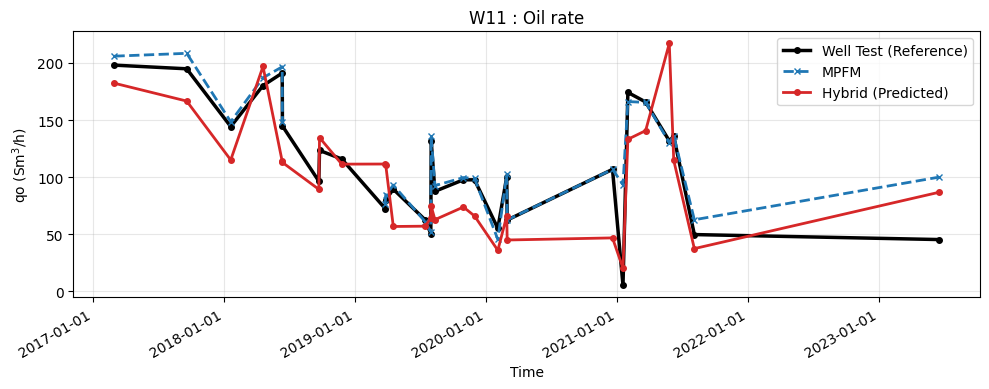

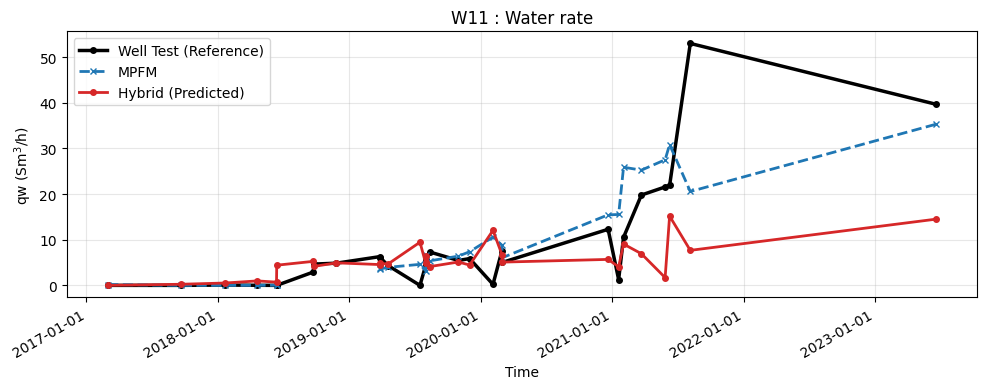

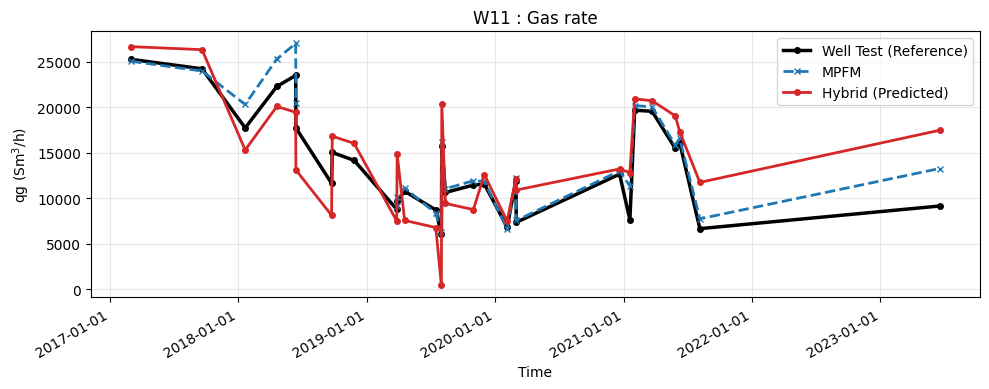

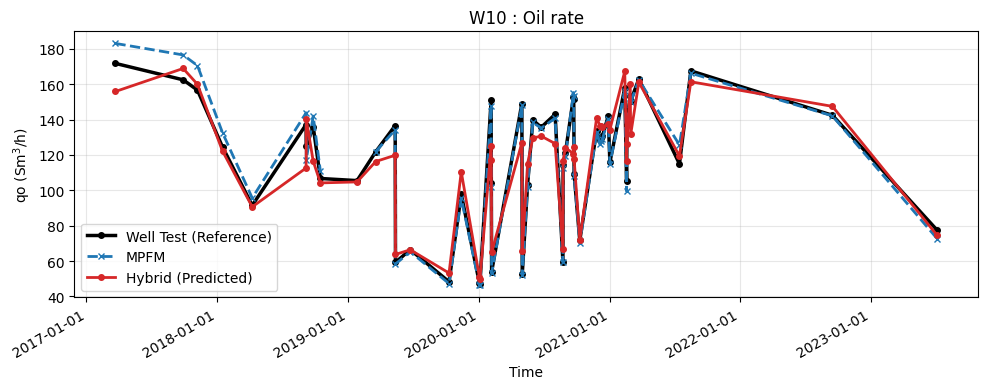

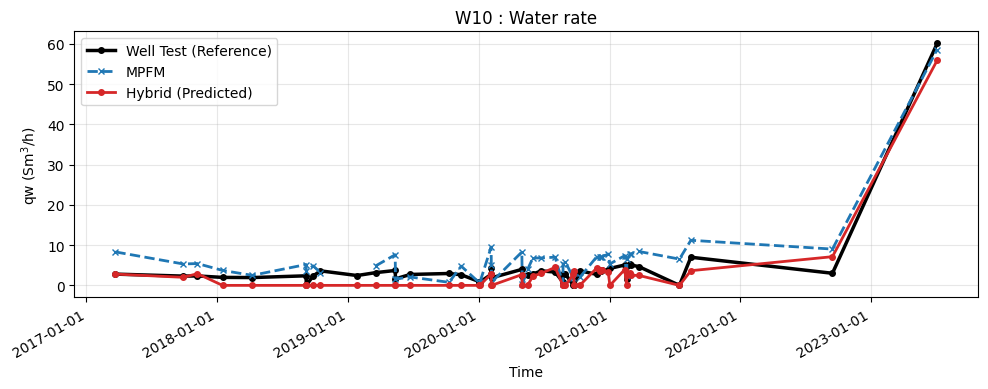

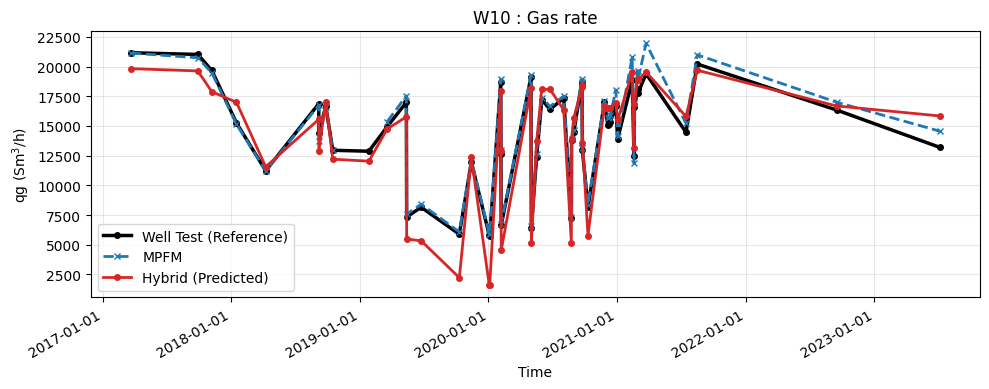

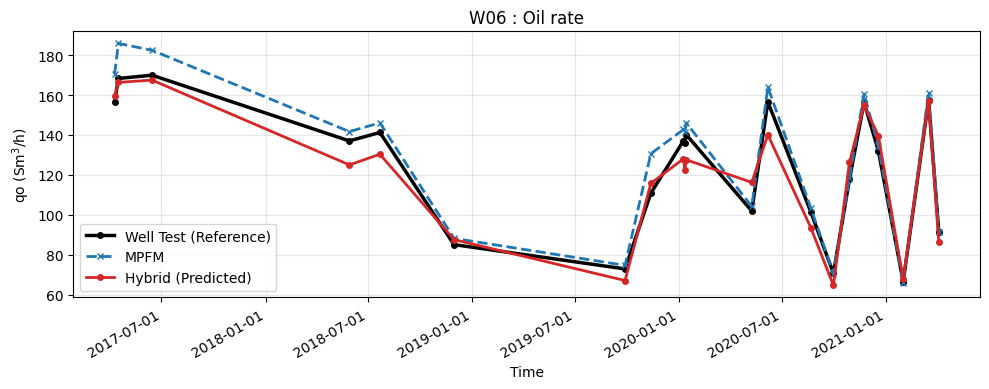

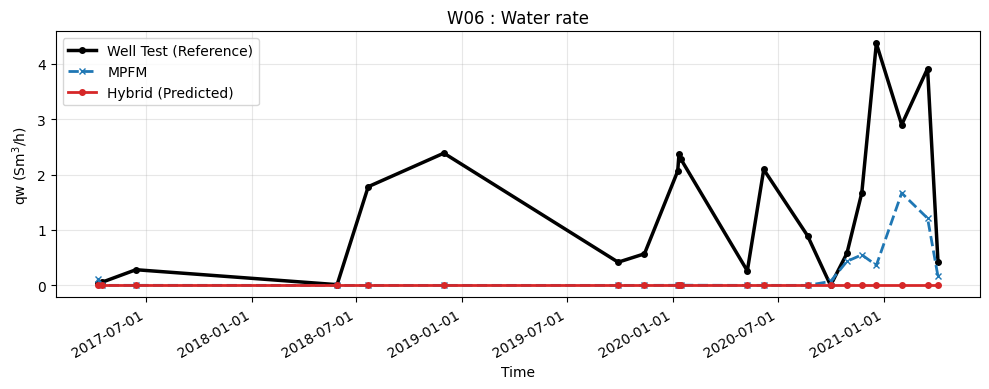

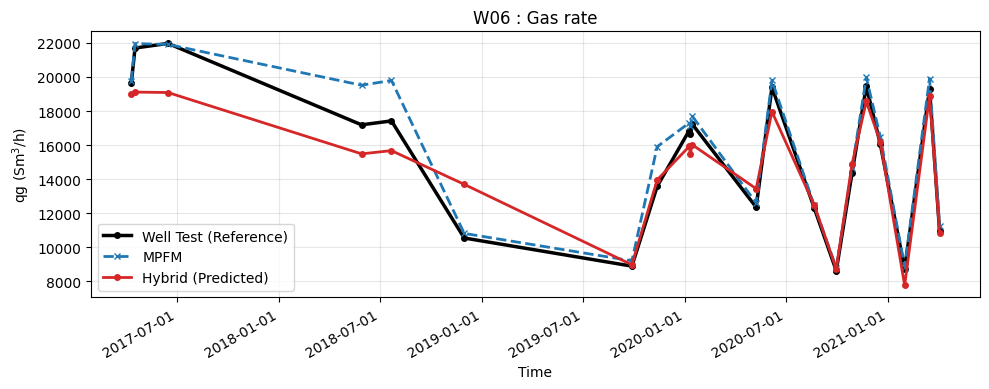

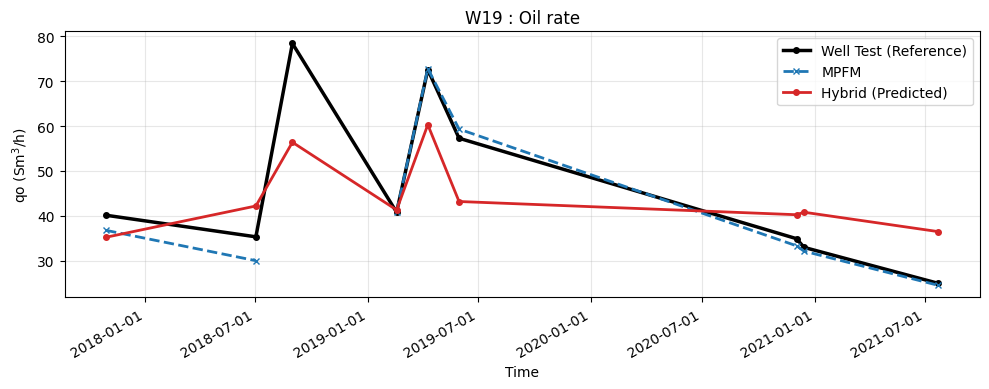

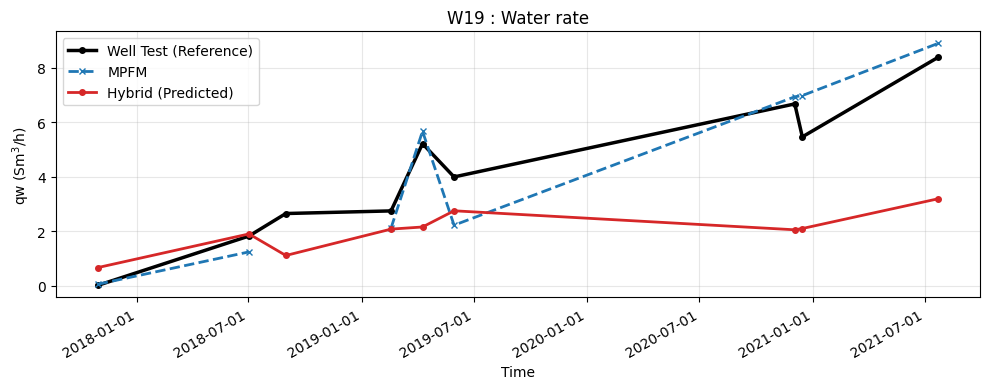

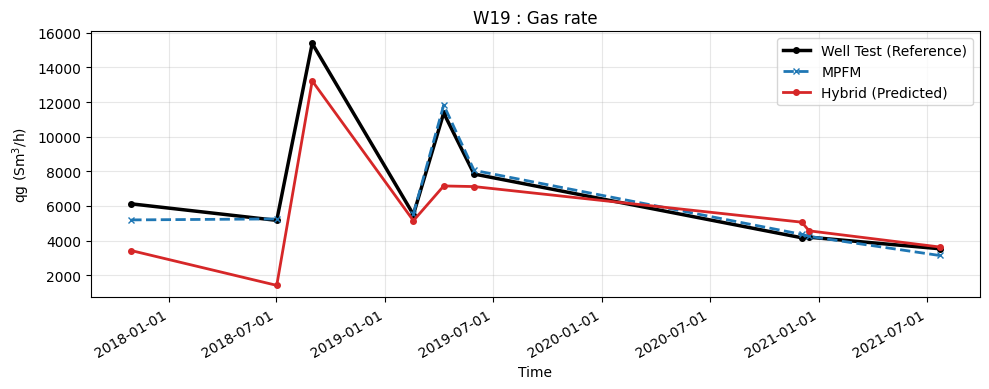

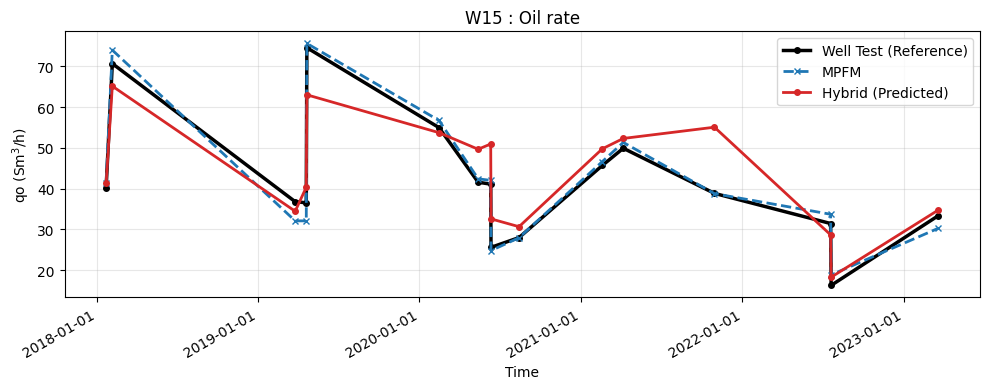

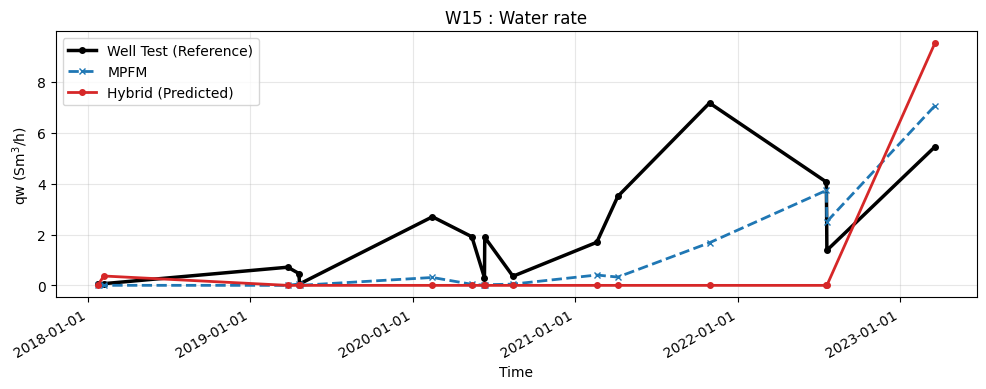

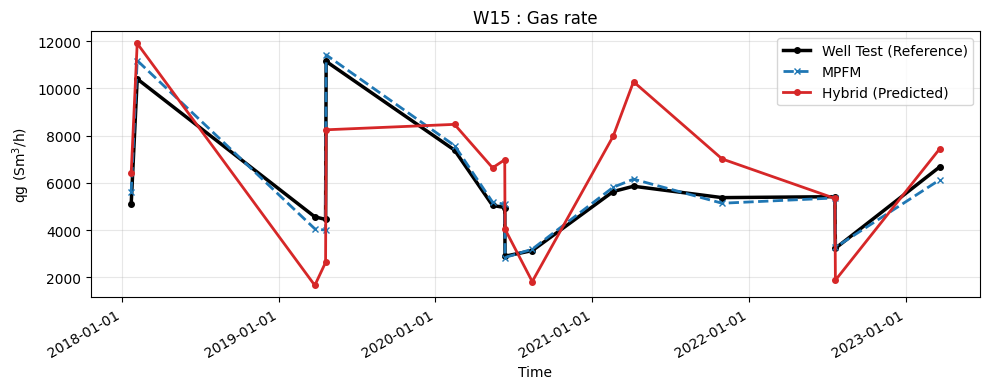

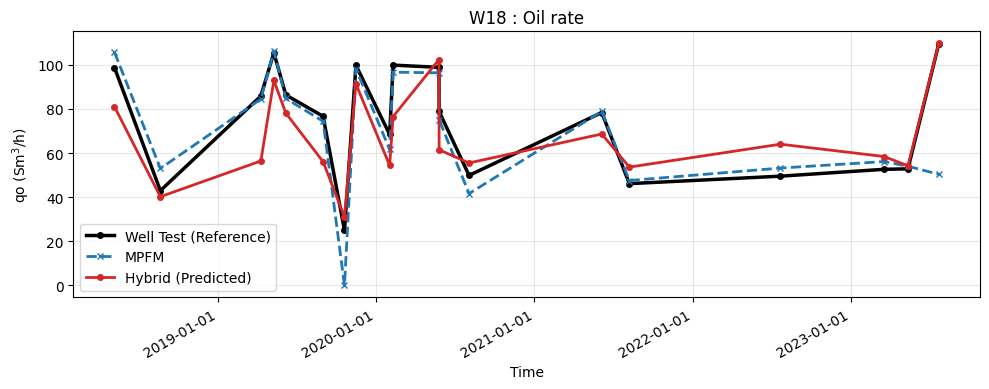

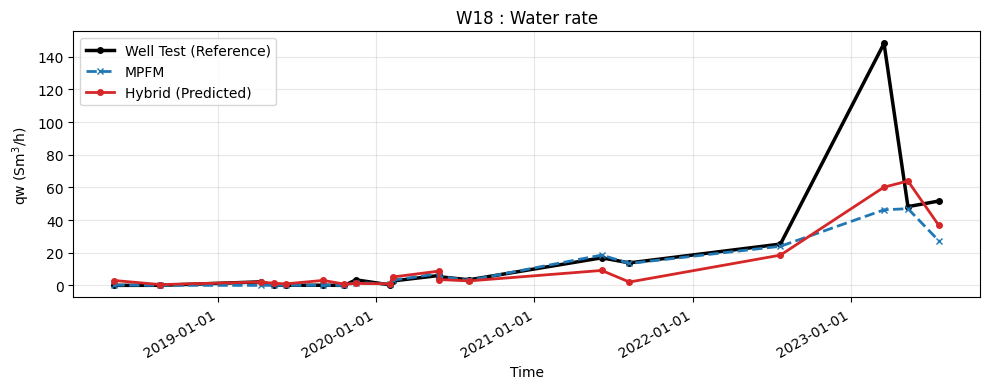

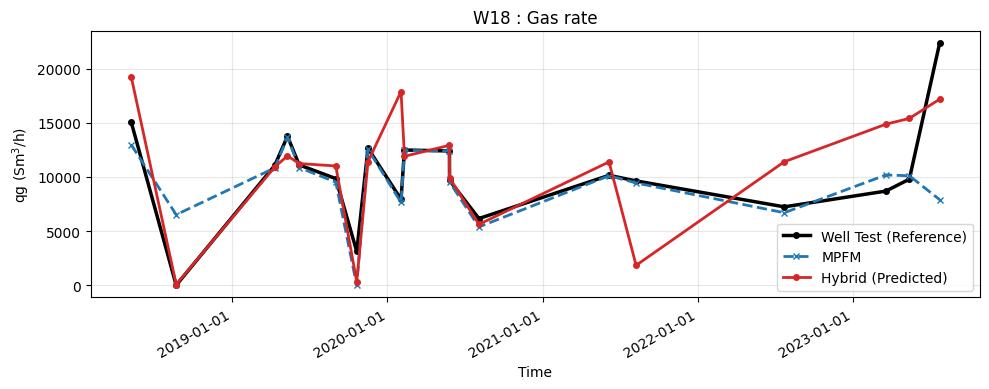

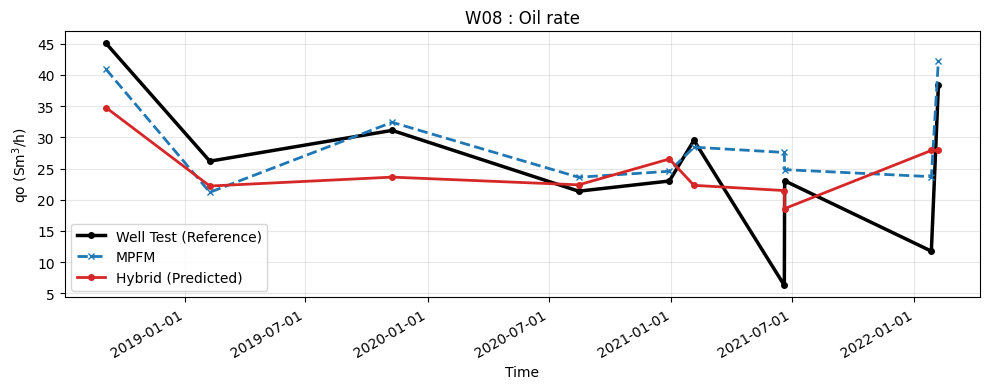

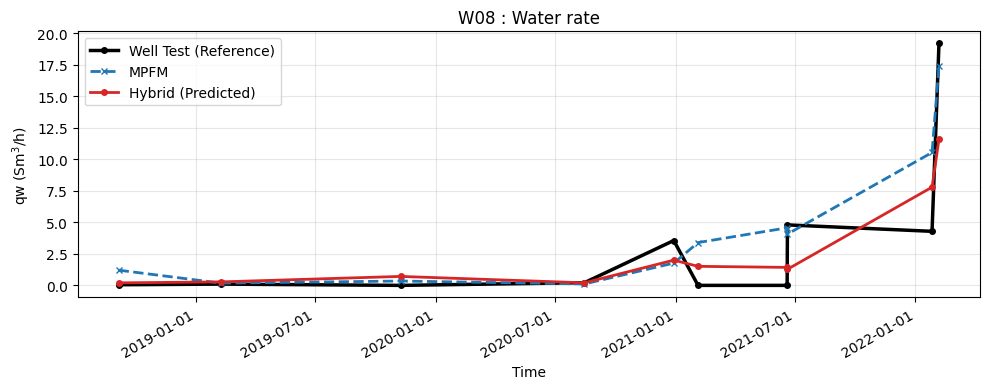

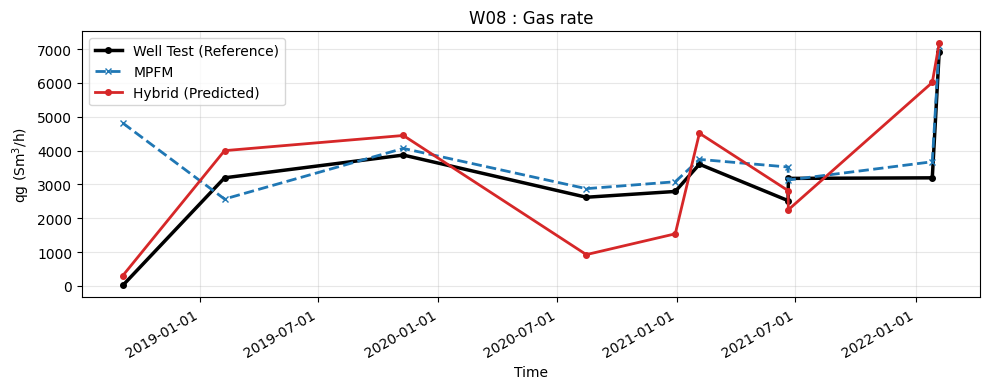

In [77]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### LOWO test

In [78]:
df_train_lowo, df_val_lowo, df_calibration_lowo, df_test_lowo = get_lowo_train_val_test_split(df=df_all_wells_preprocessed, test_well_id="W10")
print(f"Train={len(df_train_lowo)}, Val={len(df_val_lowo)}, Calibration={len(df_calibration_lowo)}, Test={len(df_test_lowo)}")

Train=429, Val=105, Calibration=24, Test=197


In [79]:
model_lowo = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry)
model_lowo.fit(df=df_train_lowo, df_val=df_val_lowo)

[Validation] Residual RMSE = 0.9323


In [80]:
model_lowo.calibrate_physics_only(df=df_calibration_lowo)

In [81]:
model_lowo.score_physics(df_test_lowo)

{'W10': {'qo': {'r2': 0.3624496223391521,
   'mae': 18.34271774314584,
   'rmse': 26.326127510984396,
   'mape (%)': 20.948553872741098,
   'mpe (%)': 11.730832534579259},
  'qw': {'r2': 0.08074362295890036,
   'mae': 3.264367903277106,
   'rmse': 10.2628009927976,
   'mape (%)': 380902193.80618066,
   'mpe (%)': 380902173.91224647},
  'qg': {'r2': 0.6335558738685088,
   'mae': 1825.0707630557015,
   'rmse': 2543.5266695571067,
   'mape (%)': 354.01859671168756,
   'mpe (%)': 339.32709982109736},
  'wgr': {'r2': 0.014916437839776142,
   'mae': 0.0002832680543402871,
   'rmse': 0.0009393128373206751,
   'mape (%)': 50699.30174771314,
   'mpe (%)': 50679.53165998244},
  'gor': {'r2': -0.8171647234903887,
   'mae': 13.758755268582773,
   'rmse': 21.544851600071734,
   'mape (%)': 206.16385923437957,
   'mpe (%)': 186.49946736657864}}}

In [82]:
model_lowo.score_hybrid(df_test_lowo)

{'W10': {'qo': {'r2': 0.7583604967724294,
   'mae': 13.395115293276639,
   'rmse': 16.207412809270345,
   'mape (%)': 11.960267186482543,
   'mpe (%)': -4.997747100521842},
  'qw': {'r2': 0.12313403520539368,
   'mae': 3.404641385803807,
   'rmse': 10.02337984348401,
   'mape (%)': 156889934.48701644,
   'mpe (%)': 156889857.42611554},
  'qg': {'r2': 0.8783395762182623,
   'mae': 1157.283055278163,
   'rmse': 1465.571718893924,
   'mape (%)': 230.3898856746011,
   'mpe (%)': 221.71374803091496},
  'wgr': {'r2': 0.1712372808399263,
   'mae': 0.00027608197150203866,
   'rmse': 0.0008615665414750906,
   'mape (%)': 23112.915098584144,
   'mpe (%)': 23033.792128049678},
  'gor': {'r2': -1.0647422896620702,
   'mae': 16.395733394843493,
   'rmse': 22.965678717632933,
   'mape (%)': 245.88163370028906,
   'mpe (%)': 239.46667741547563}}}

In [83]:
model_lowo.score_mpfm(df=df_test_lowo)

{'W10': {'qo': {'r2': 0.9583419266691962,
   'mae': 4.13491196064588,
   'rmse': 6.769909701889733,
   'mape (%)': 3.451733823676832,
   'mpe (%)': 1.165532017127057},
  'qw': {'r2': 0.9252126510965933,
   'mae': 2.513654999997773,
   'rmse': 2.954705596721148,
   'mape (%)': 389818029.3325561,
   'mpe (%)': 389818016.9738779},
  'qg': {'r2': 0.9410243291393691,
   'mae': 512.175466368421,
   'rmse': 1026.554371880411,
   'mape (%)': 446.2314325485885,
   'mpe (%)': 445.3532645834092},
  'wgr': {'r2': 0.9486526542824869,
   'mae': 0.00017173197841502752,
   'rmse': 0.0002166150814940326,
   'mape (%)': 88201.46100918653,
   'mpe (%)': 88189.41736284945},
  'gor': {'r2': 0.12509038328320254,
   'mae': 7.989785832079501,
   'rmse': 15.102907991245015,
   'mape (%)': 453.8456576781636,
   'mpe (%)': 449.82246538604886}}}

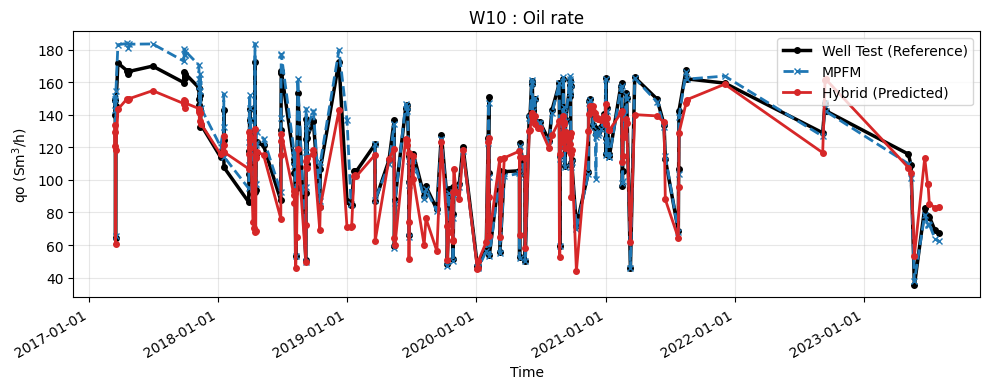

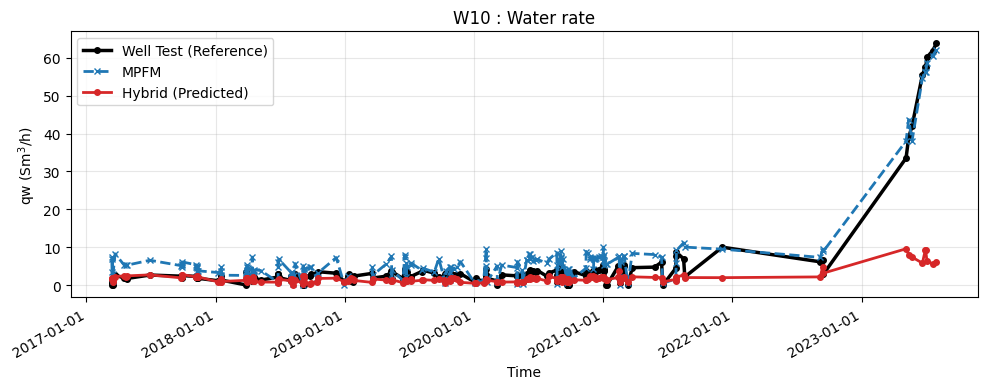

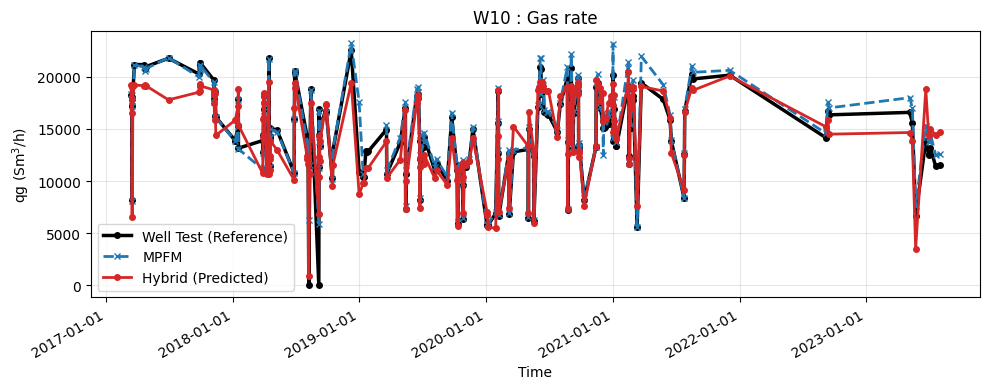

In [84]:
model_lowo.plot_predictions(df=df_test_lowo, model_tag_prefix="lowo")

### Resample and interpolate

In [85]:
# resampler = Resampler()
# df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
# print(summarize_null(df=df_resampled))
# print(df_resampled.shape)

In [86]:
# df_resampled.index

In [87]:
# df_resampled.columns

In [88]:
# df_resampled[df_resampled["is_observed"] == 1].shape

In [89]:
# Monotonic
# df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

In [90]:
# df_generated = model.generate_dense_well_rates(df=df_resampled)
# df_generated

In [91]:
# summarize_null(df_generated)